# Lista 02 - Pandas Básico

Uma parte significativa do trabalho de um cientista de dados é explorar, analisar e visualizar dados. Há uma grande variedade de ferramentas e linguagens de programação que eles podem usar para fazer isso, e uma das abordagens mais populares é usar notebooks Jupyter (como este) e Python.

Neste notebook, vamos explorar o pacote [Pandas](http://pandas.pydata.org) e o [Matplotlib](http://matplotlib.org). Também aplicaremos técnicas básicas para analisar dados. Este notebook não é um exercício de programação Python abrangente; ou até mesmo um mergulho profundo na análise de dados. Em vez disso, pretende ser um curso intensivo sobre algumas das maneiras comuns em que os cientistas de dados podem usar Python para explorar com dados.

## Imports Básicos

As três células abaixo apenas configuram nosso notebook para ficar mais parecido com os das aulas

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [18]:
plt.ion()
# plt.style.use('seaborn-colorblind')

## NumPy Novamente

Vamos começar examinando alguns dados simples.

Em determinadas épocas do ano a venda de certos produtos sofre um aumento significativo. Um exemplo disso, são as vendas de sorvete que aumentam bastante no verão. Além do sorvete, outros itens como protetor solar e vestuário de banho podem ganhar maior atenção durante essa época do ano enquanto outros produtos podem não ser tão valorizados.

Inicialmente, vamos criar alguns dadoos de vendas de sorvete.

In [19]:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
print(ice_cream)

[3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]


Os dados foram carregados em um TAD **list**. Como falamos no último laboratório, listas não são otimizadas para análise numérica. Para isso, vamos usar o pacote **NumPy** novamente. Então, vamos criar um vetor Numpy dos dados!

In [20]:
ice_cream_v = np.array(ice_cream)
print(ice_cream_v)

[3000 2600 1400 1500 1200  500  300  400  700  600  800 1900]


Caso você ainda esteja se perguntando sobre as diferenças entre uma **list** e uma **array numpy (np.array)**, vamos comparar como esses tipos de dados se comportam quando os usamos em uma expressão que os multiplica por 2.

In [21]:
print (type(ice_cream),'x 2:', ice_cream * 2)
print('---')
print (type(ice_cream_v),'x 2:', ice_cream_v * 2)

<class 'list'> x 2: [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900, 3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
---
<class 'numpy.ndarray'> x 2: [6000 5200 2800 3000 2400 1000  600  800 1400 1200 1600 3800]


Observe que multiplicar uma lista por 2 cria uma nova lista com o dobro do comprimento e a sequência original de elementos da lista repetida. Multiplicar um array NumPy, por outro lado, realiza um cálculo elementar no qual o array se comporta como um *vetor*. Terminamos com um array do mesmo tamanho no qual cada elemento foi multiplicado por 2.

A principal conclusão disso é que os arrays NumPy são projetados especificamente para suportar operações matemáticas em dados numéricos.

In [22]:
np.median(ice_cream_v)

np.float64(1000.0)

### Exercício 01

Altere a função abaixo para retornar a mediana do valor dos sorvetes e o número de elementos no array.

In [23]:
def median_and_size(array):
    # Retorne uma tupla, abaixo temos um return de exemplo
    median = np.median(ice_cream_v)
    size = np.size(ice_cream_v)

    return (median, size)

Novamente, vanos carregar os módulos de testes

In [24]:
from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

from numpy.testing import assert_array_almost_equal
from numpy.testing import assert_array_equal

Nosso teste

In [25]:
median, size = median_and_size(ice_cream_v)
assert_equal(1000, median)
assert_equal(12, size)

In [26]:
len(ice_cream_v)

12

## Pandas

Embora o NumPy forneça muitas das funcionalidades de que você precisa para trabalhar com números, quando você começa a lidar com tabelas de dados bidimensionais, o pacote Pandas oferece uma estrutura mais conveniente para trabalhar - o DataFrame.

Agora, vamos criar alguns dados de vendas de outros produtos. Além do mais, vamos criar um array de meses.

In [27]:
ice_cream = np.array([3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900])
sunglasses = np.array([1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900])
coats = np.array([10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20])
labels = np.array(["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"])

O código abaixo cria um DataFrame na mão. É mais comum ler dados de arquivos. Porém, neste laboratório inicial, vamos usar um DataFrame com a pequena base de dados acima. A tabela vai ser da seguinte forma:

```
       icecream   sunglasses   coats
------------------------------------
Jan     3000        1000        10
Fev     2600        800         20
...     ...         ...        ...
Dez     1900        900         20
```

Observe que, além das colunas que você especificou, o DataFrame inclui um índice para identificar cada linha de forma exclusiva.

In [28]:
df = pd.DataFrame({'icecream': ice_cream,      # coluna 0
                   'sunglasses': sunglasses,   # coluna 1
                   'coats': coats},            # coluna 2
                   index=labels)

A chamada head mostra as 5 primeiras linhas do DataFrame.

In [29]:
df.head()

,icecream,sunglasses,coats
Jan,3000,1000,10
Fev,2600,800,20
Mar,1400,100,80
Abr,1500,70,120
Mai,1200,50,100


### Exercício 02

Lembre-se da sala de aula que pandas contém chamadas `loc` e `iloc` para acessar o índice. Sabendo disto, implemente a função abaixo que retorna a quantidade de vendas em um dado mês na forma de `string`. A sua função deve retornar uma Series do pandas. Por exemplo, segue a saída esperada para 'Jan'.

```python
month_sales(df, 'Jan')
```

```
icecream      3000
sunglasses    1000
coats           10
Name: Jan, dtype: int64
```

In [38]:
def month_sales(df, month: str):
    return df.loc[month]

In [39]:
series = month_sales(df, 'Jan')
assert_equal(3000, series.loc['icecream'])
assert_equal(1000, series.loc['sunglasses'])
assert_equal(10, series.loc['coats'])

### Exercício 03

Agora, implemente uma função que retorna uma linha do DataFrame a partir do número da linha (um número inteiro).

In [40]:
def row_sales(df, row: int):
    return df.iloc[row]

In [41]:
series = row_sales(df, 0)
assert_equal(3000, series.loc['icecream'])
assert_equal(1000, series.loc['sunglasses'])
assert_equal(10, series.loc['coats'])

### Exercício 04 (Sem correção Automática)

Agora, faça um gráfico estilo o abaixo para entender a venda de produtos ao longo dos meses. Esta tarefa não tem correção automática, use o gráfico abaixo para saber se acertou ou não.

Lembre-se que em Pandas os data frames contém um método [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). Leia a documentação do mesmo caso necessário.

![](https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l2/plot1.png)

<Axes: >

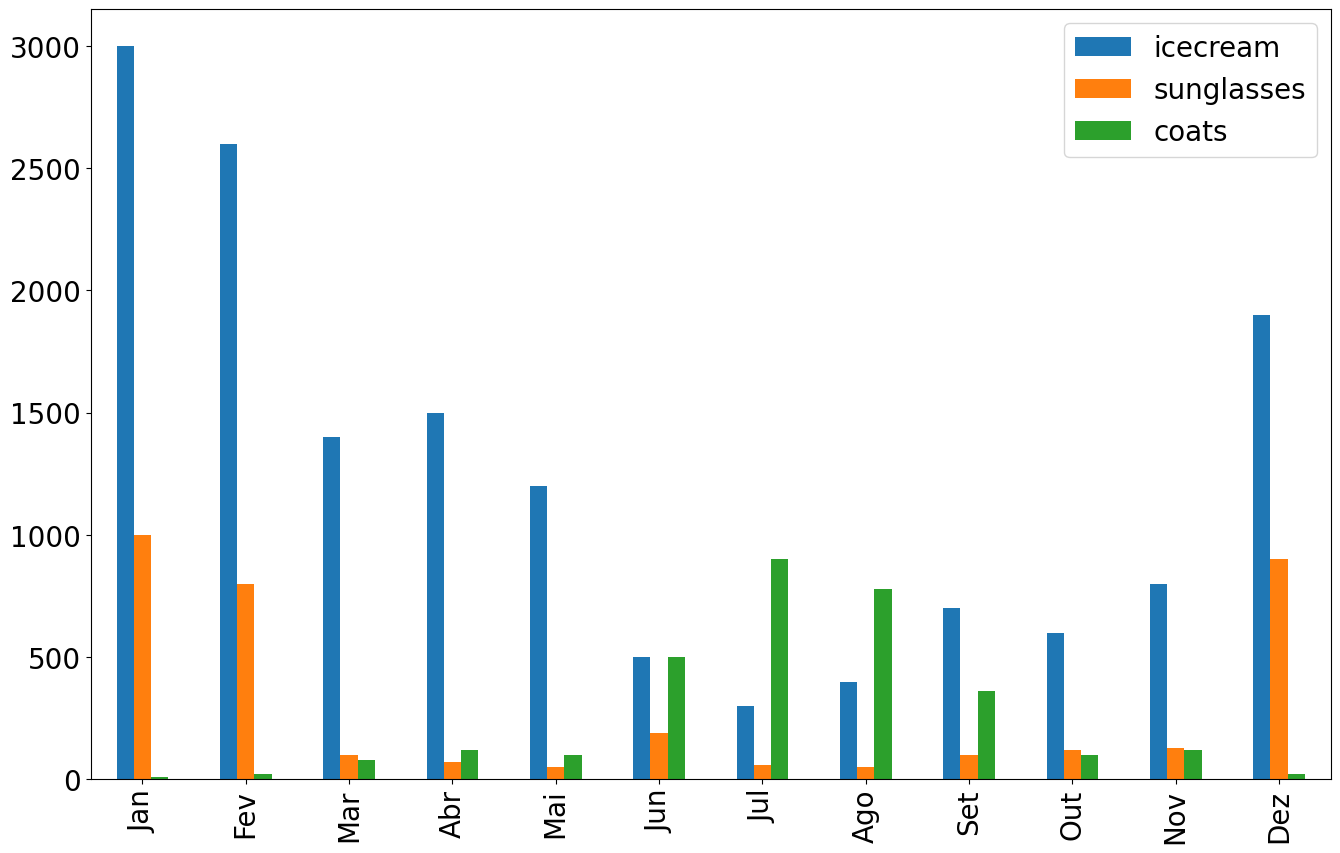

In [44]:
#seu código do Exercício 4 aqui:
df.plot(kind="bar")

### Exercício 05

Agora, altere a função abaixo para retornar 'Norte' caso você acha ache que o país das vendas acima é do hemisfério norte. Retorne 'Sul' caso contrário.

In [ ]:
def north_or_south():
    # retorne 'Norte' ou 'Sul'
    return 'Sul' # verao em Dez/Jan e inverno em Jul/Ago

### Exercício 06

Por fim, crie um método que retorne as estatísticas agregadas. Seu método deve retornar um novo DataFrame no seguinte formato.

```
          icecream   sunglasses       coats
count    12.000000    12.000000   12.000000
mean   1241.666667   297.500000  259.166667
std     879.522942   367.896354  308.676304
min     300.000000    50.000000   10.000000
25%     575.000000    67.500000   65.000000
50%    1000.000000   110.000000  110.000000
75%    1600.000000   342.500000  395.000000
max    3000.000000  1000.000000  900.000000
```

Uma única chamada Pandas resolve este problema!

In [48]:
def questao6(df):
    return df.describe()

## Arquivos

É bem mais comum fazer uso de DataFrames que já existem em arquivos. Note que o trabalho do cientista de dados nem sempre vai ter tais arquivos prontos. Em várias ocasiões, você vai ter que coletar e organizar os mesmos. Limpeza e coleta de dados é uma parte fundamental do seu trabalho. Durante a matéria, boa parte dos notebooks já vão ter dados prontos.

Neste último exercício, vamos fazer uso dos dados de [John Snow](http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/). Os dados já foram limpos para a tarefa.

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/icd-ufmg/icd-ufmg.github.io/master/listas/l2/snow.csv')
df.head()

,Count,geometry,NearestPumpID
0,3,POINT (529308.7414200425 181031.3515464273),0
1,2,POINT (529312.163571333 181025.1724011325),0
2,1,POINT (529314.3824294576 181020.2936884186),0
3,1,POINT (529317.3796448297 181014.2587706869),0
4,4,POINT (529320.6754489439 181007.8716281414),0


A coluna Count indica o número de mortes em uma casa. A NearestPumpID indica qual bomba d'água é a mais próxima da casa. Os dados não vão bater com os da aula, pois não tínhamos a informação precisa onde cada casa pegava água. Apenas assumi ser no local mais próximo!

## Groupby

Vamos responder uma pergunta com a função groupby. Lembrando a ideia é separar os dados com base em valores comuns, ou seja, agrupar por nomes e realizar alguma operação. O comando abaixo agrupa todos os recem-náscidos por nome. Imagine a mesma fazendo uma operação equivalente ao laço abaixo:

```python
buckets = {}                    # Mapa de dados
names = set(df['Name'])         # Conjunto de nomes únicos
for idx, row in df.iterrows():  # Para cada linha dos dados
    name = row['Name']
    if name not in buckets:
        buckets[name] = []      # Uma lista para cada nome
    buckets[name].append(row)   # Separa a linha para cada nome
```
O código acima é bastante lento!!! Enquanto isso, o groupby é otimizado, sendo bem mais rápido!

### Exercício 07

Implemente uma função que retorna a quantidade de mortes para cada bomba. Use o `groupby`.

In [55]:
def mortes_por_pump(df):
    return df[['Count', 'NearestPumpID']].groupby('NearestPumpID').sum()